In [1]:
import os
import string
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [2]:
# download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghastly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# add custom stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
my_stopwords = stopwords.words('english')
my_stopwords.append('subject:')
my_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### save stopwords

In [9]:
import pickle

with open('stopwords.pkl', 'wb') as outfile:
    pickle.dump(my_stopwords, outfile)

## data set path

In [5]:
emails_path = os.path.join('../../../data', 'emails.csv')

In [6]:
emailDf = pd.read_csv(emails_path)

In [7]:
emailDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [8]:
original_length = len(emailDf)

## explore data

In [9]:
def spamVhamPieChart(df):
    spamValCounts = emailDf['spam'].value_counts()
    hamCount = spamValCounts[0]
    spamCount = spamValCounts[1]
    labels = ['Spam','Ham']
    sizes = [spamCount,hamCount]
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
    plt.show()

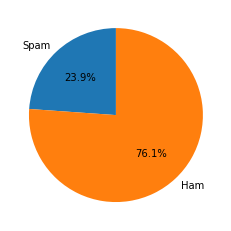

In [10]:
# we can see that as-is, the dataset is about one-quarter spam emails

spamVhamPieChart(emailDf)

In [11]:
# look at some sample email text

for i in range(5):
    print(emailDf['text'][i])
    print()

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

## remove duplicates

In [12]:
emailDf.drop_duplicates(keep='first',inplace=True)

In [13]:
emailDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 133.5+ KB


In [14]:
emailDf.reset_index(drop=True,inplace=True)

In [15]:
original_length - len(emailDf)

33

## text preprocessing

In [16]:
# cleaning raw text data
def cleanEmail(emailText):
    # lower case
    lower = emailText.lower()
    # remove stop words
    removeStop = ' '.join([word for word in lower.split() if word not in my_stopwords])
    # remove hyperlinks
    removeUrl = re.sub(r"http\S+", "", removeStop)
    # remove special characters
    removePunc = removeUrl.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return removePunc

In [17]:
copyDf = emailDf.copy()

In [18]:
%%time

emailDf['cleaned_text'] = copyDf.text.apply(lambda x: cleanEmail(x))

Wall time: 2.7 s


In [19]:
emailDf.head()

,text,spam,cleaned_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional in...
4,"Subject: do not have money , get software cds ...",1,money get software cds software compatibilit...


## split into train/test sets

In [20]:
x_train,x_test,y_train,y_test = train_test_split(emailDf.cleaned_text, emailDf.spam, test_size=0.2)

In [21]:
x_train.shape

(4556,)

## tokenizing cleaned data

In [22]:
EMBED_SIZE = 100
MAX_FEATURES = 50000
MAX_LEN = 2000

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_FEATURES)

In [24]:
tokenizer.fit_on_texts(x_train)

In [25]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train), dtype=object)
x_test_features = np.array(tokenizer.texts_to_sequences(x_test), dtype=object)

### save the tokenizer

In [26]:
import json
import io

tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

## padding

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_features = pad_sequences(x_train_features, maxlen=MAX_LEN)
x_test_features = pad_sequences(x_test_features, maxlen=MAX_LEN)

## encode target labels

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [29]:
y_train_enc = le.fit_transform(y_train.values)
y_test_enc = le.transform(y_test.values)

# model

In [30]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model

In [31]:
# create the model - note to self, will not work with Python 3.7 version tf, does work with Python 3.6
import tensorflow as tf
embedding_vector_length = 32

model = tf.keras.Sequential()
model.add(Embedding(MAX_FEATURES, embedding_vector_length, input_length=MAX_LEN))
# model.add(Bidirectional(tf.keras.layers.LSTM(64))) --- not enough memory on my 1060 ***********************************
model.add(Bidirectional(tf.keras.layers.LSTM(32)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          1600000   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,617,697
Trainable params: 1,617,697
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
history = model.fit(x_train_features, y_train, batch_size=512, epochs=20, validation_data=(x_test_features, y_test))

Train on 4556 samples, validate on 1139 samples
Epoch 1/20
4556/4556 [==============================] - 9s 2ms/sample - loss: 0.6612 - accuracy: 0.7548 - val_loss: 0.6154 - val_accuracy: 0.7665
Epoch 2/20
4556/4556 [==============================] - 3s 670us/sample - loss: 0.5701 - accuracy: 0.7581 - val_loss: 0.5202 - val_accuracy: 0.7665
Epoch 3/20
4556/4556 [==============================] - 3s 658us/sample - loss: 0.4988 - accuracy: 0.7581 - val_loss: 0.4099 - val_accuracy: 0.7665
Epoch 4/20
4556/4556 [==============================] - 3s 656us/sample - loss: 0.3187 - accuracy: 0.8049 - val_loss: 0.2382 - val_accuracy: 0.9008
Epoch 5/20
4556/4556 [==============================] - 3s 667us/sample - loss: 0.1880 - accuracy: 0.9759 - val_loss: 0.1590 - val_accuracy: 0.9719
Epoch 6/20
4556/4556 [==============================] - 3s 676us/sample - loss: 0.1360 - accuracy: 0.9923 - val_loss: 0.1155 - val_accuracy: 0.9772
Epoch 7/20
4556/4556 [==============================] - 3s 675us/s

## model accuracy

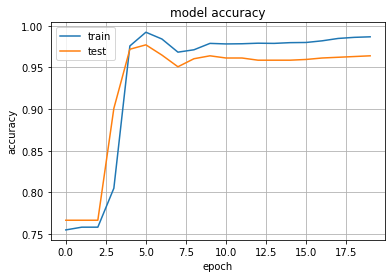

In [33]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [35]:
y_predict  = [1 if o > 0.5 else 0 for o in model.predict(x_test_features)]

In [36]:
cf_matrix = confusion_matrix(y_test, y_predict)

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

[Text(0, 0.5, 'Not Spam'), Text(0, 1.5, 'Spam')]

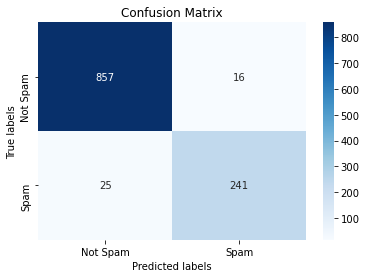

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt=''); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])

In [39]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(y_test, y_predict)))

Precision: 93.77%
Recall: 90.60%
F1 Score: 92.16%


In [40]:
f1_score(y_test, y_predict)

0.921606118546845

## save model

In [41]:
model.save('spam_or_ham.h5')